In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import os
from datetime import datetime
import random
from scipy import stats
import gc
import pickle

In [3]:
data = pd.read_csv('Data/balanced/balanced_data.csv',names=['event_time','event_type','product_id','category_id','category_code','brand','price','user_id','user_session'])

In [4]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:09:33 UTC,cart,1002524,2053013555631882655,electronics.smartphone,apple,515.669983,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238
1,2019-10-01 00:11:00 UTC,cart,4804056,2053013554658804075,electronics.audio.headphone,apple,161.979996,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683
2,2019-10-01 02:17:59 UTC,cart,1004833,2053013555631882655,electronics.smartphone,samsung,174.759995,536415846,685b5b42-f597-4a69-ab4c-ef96a30bc454
3,2019-10-01 02:19:36 UTC,cart,1005003,2053013555631882655,electronics.smartphone,huawei,258.209991,513632293,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda
4,2019-10-01 02:19:43 UTC,cart,1004750,2053013555631882655,electronics.smartphone,samsung,197.429993,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291


In [5]:
data.event_type.value_counts()

purchase    549507
cart        549507
Name: event_type, dtype: int64

In [91]:
data.describe()

,product_id,category_id,price,user_id
count,1.099014e+06,1.099014e+06,1.099014e+06,1.099014e+06
mean,2.599067e+06,2.054444e+18,3.690082e+02,5.356363e+08
std,4.145813e+06,1.249888e+16,3.647197e+02,1.811378e+07
min,1.000978e+06,2.053014e+18,8.800000e-01,2.843448e+08
25%,1.004767e+06,2.053014e+18,1.320500e+02,5.168388e+08
50%,1.004990e+06,2.053014e+18,2.307900e+02,5.355225e+08
75%,2.800433e+06,2.053014e+18,4.606300e+02,5.537484e+08
max,6.050000e+07,2.173217e+18,2.574040e+03,5.662783e+08


In [92]:
data.shape

(1099014, 9)

In [93]:
data.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

## No. of users

In [94]:
visitors = data.user_id.nunique()
print('Visitor: ',visitors)

Visitor:  343007


## Daily visitors

In [95]:
d = data.loc[:,['event_time','user_id']]
d['event_time'] = d['event_time'].apply(lambda x: str(x)[:10])

In [96]:
visitor_by_date = d.drop_duplicates().groupby(['event_time'])['user_id'].agg(['count']).sort_values(by=['event_time'], ascending=True)

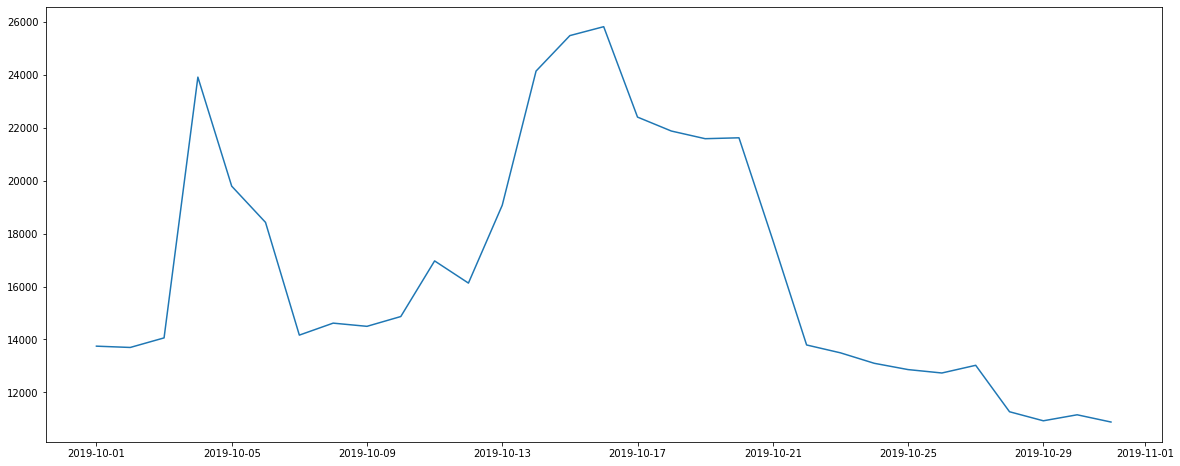

In [97]:
x = pd.Series(visitor_by_date.index.values).apply(lambda x:datetime.strptime(x,'%Y-%m-%d').date())
y = visitor_by_date['count']
plt.figure(figsize=(20,8))
plt.plot(x,y)
plt.show()

## Most interected product categories

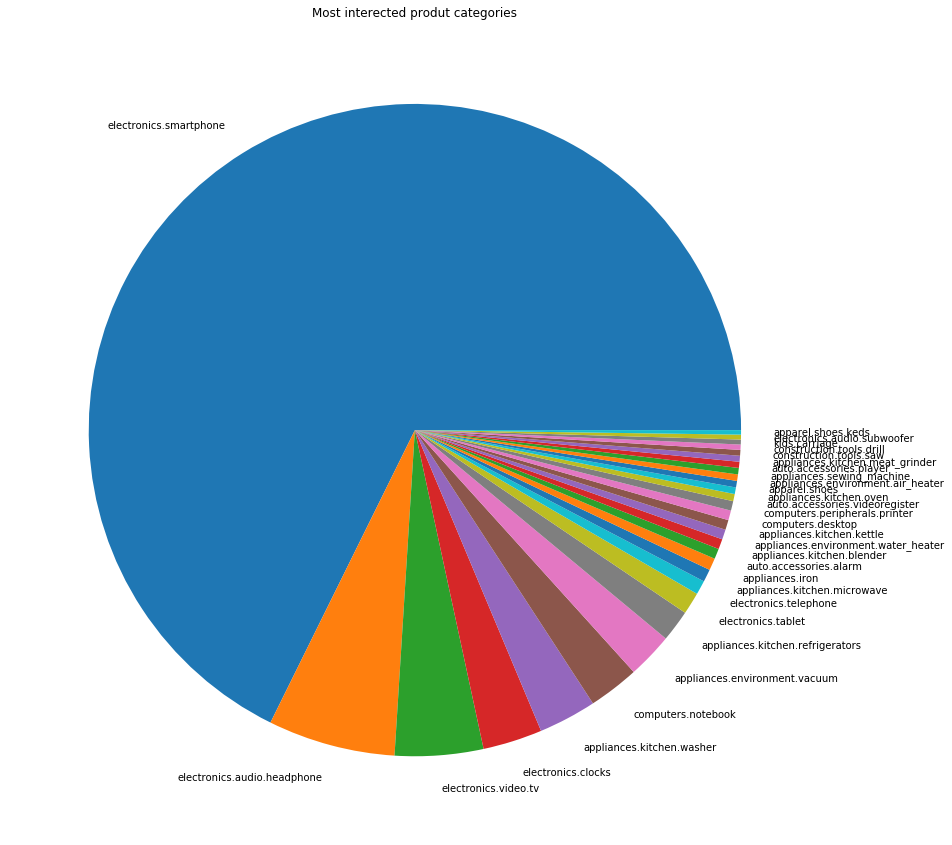

In [98]:
cat_code = data.category_code.value_counts()[:30].sort_values(ascending=False)
plt.figure(figsize=(15,15))
plt.pie(cat_code,labels=cat_code.keys())
plt.title('Most interected produt categories')
plt.show()

## Distribution of the event type 

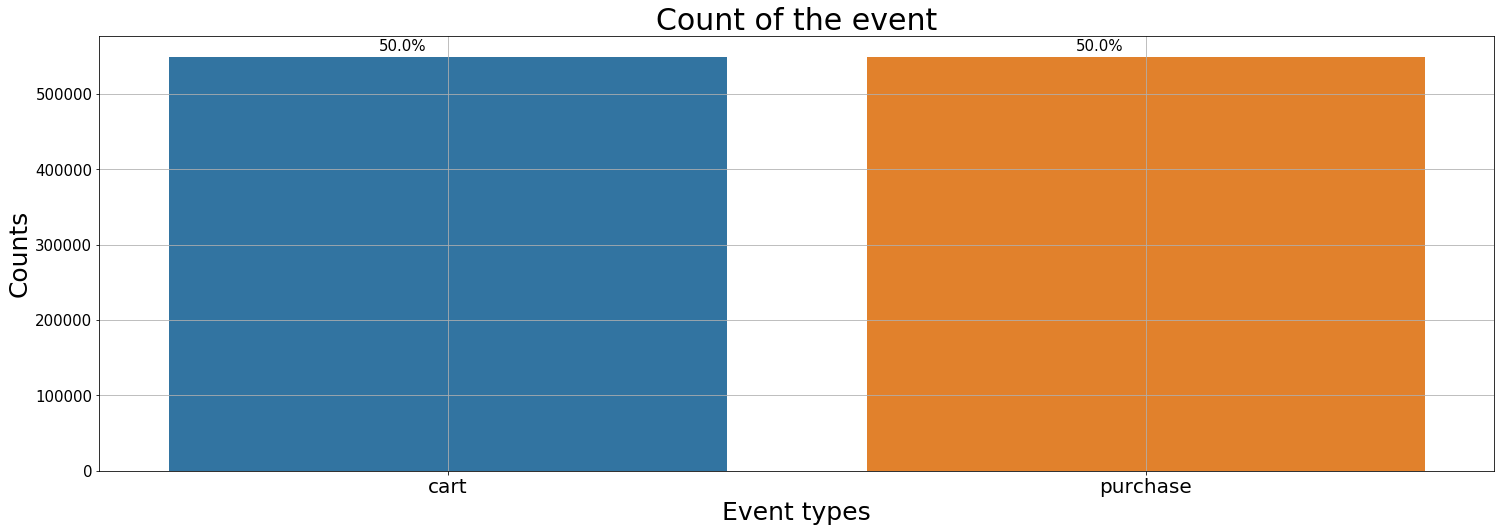

In [3]:
# https://datascience.stackexchange.com/a/48044/91657
plt.figure(figsize=(25,8))
l = data.event_type.value_counts().index
ax = sbn.countplot(x='event_type',data=data,order=l)
total = len(data)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 -.1
        y = p.get_y() + p.get_height()*1.015
        ax.annotate(percentage, (x, y),fontsize=15)
plt.xlabel('Event types',fontsize=25)
plt.ylabel('Counts',fontsize=25)
plt.title('Count of the event',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

# plt.figure(figsize=(25,8))
# data["binned_week"] = data.timestamp.dt.week
# binned =data.groupby('binned_week')['event_type'].agg('count').values
# ax = sbn.countplot(x='binned_week',hue='event_type',data=data,hue_order=l)
# i =0
# for p in ax.patches:
#         percentage = '{:.1f}%'.format(100 * p.get_height()/binned[i//4])
#         i+=1
#         x = p.get_x() + p.get_width()/2 -.1
#         y = p.get_y() + p.get_height()*1.015
#         ax.annotate(percentage, (x, y),fontsize=15)
# plt.xlabel('Event types',fontsize=25)
# plt.ylabel('Counts',fontsize=25)
# plt.title('Count of the event in each week',fontsize=30)
# labels = ['week 1','week 2','week 3','week 4','week 5']
# plt.xticks([0,1,2,3,4],labels,fontsize=20)
# plt.yticks(fontsize=15)
# plt.grid()
# plt.legend(fontsize=16)
# plt.show()

## What kind of products are purchased?

In [100]:
purchase= data[data['event_type']=='purchase'][['category_code','price','brand']]
purchase.dropna(inplace=True)
purchase.head(10)

,category_code,price,brand
549507,electronics.smartphone,130.759995,samsung
549508,electronics.smartphone,642.690002,apple
549509,furniture.bathroom.toilet,54.419998,santeri
549510,electronics.audio.headphone,189.910004,apple
549511,electronics.audio.headphone,161.979996,apple
549512,electronics.smartphone,515.669983,apple
549513,appliances.environment.air_heater,28.030001,oasis
549514,electronics.audio.headphone,171.559998,apple
549515,electronics.smartphone,463.309998,vivo
549516,electronics.smartphone,736.179993,apple


## Top seller brands

In [101]:
top_brands = data.groupby('brand')['brand'].agg(['count']).sort_values('count',ascending=False)
top_brands.head(20)

,count
brand,
samsung,376473
apple,285782
xiaomi,103832
huawei,52209
oppo,23954
lg,16072
acer,13017
elenberg,9938
indesit,9561


## Add new features
* category_code_level1: category
* category_code_level2: sub-category
* event_weekday: weekday of the event
* activity_count: number of activity in that session
* is_purchased: whether the put in cart item is purchased

In [6]:
data.drop_duplicates(subset=['event_type','product_id','price','user_id','user_session'],inplace=True)
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:09:33 UTC,cart,1002524,2053013555631882655,electronics.smartphone,apple,515.669983,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238
1,2019-10-01 00:11:00 UTC,cart,4804056,2053013554658804075,electronics.audio.headphone,apple,161.979996,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683
2,2019-10-01 02:17:59 UTC,cart,1004833,2053013555631882655,electronics.smartphone,samsung,174.759995,536415846,685b5b42-f597-4a69-ab4c-ef96a30bc454
3,2019-10-01 02:19:36 UTC,cart,1005003,2053013555631882655,electronics.smartphone,huawei,258.209991,513632293,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda
4,2019-10-01 02:19:43 UTC,cart,1004750,2053013555631882655,electronics.smartphone,samsung,197.429993,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291


In [7]:
data.event_type.value_counts()

purchase    507566
cart        369036
Name: event_type, dtype: int64

In [8]:
data['is_purchased'] = data['event_type']
data['is_purchased'] = data['is_purchased'].map({'purchase':1,'cart':0})
data['is_purchased'] = data.groupby(['user_session','product_id'])['is_purchased'].transform('max')
# add week day of the record
data['event_weekday'] = data['event_time'].apply(lambda x:str(datetime.strptime(str(x)[:10],'%Y-%m-%d').weekday()))
data['hour'] = data['event_time'].apply(lambda x:str(datetime.strptime(str(x)[:-4],'%Y-%m-%d %H:%M:%S').hour))
data['day'] = data['event_time'].apply(lambda x:str(datetime.strptime(str(x)[:-4],'%Y-%m-%d %H:%M:%S').day))

# add level 1 and 2 category
data["category_code_level1"] = data["category_code"].str.split(".",expand=True)[0]
data["category_code_level2"] = data["category_code"].str.split(".",expand=True)[1]
data['event_time'] = data['event_time'].apply(lambda x:datetime.strptime(str(x)[:-4],'%Y-%m-%d %H:%M:%S'))

In [7]:
data.is_purchased.value_counts()

1    692208
0    184394
Name: is_purchased, dtype: int64

In [8]:
data.isna().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code           0
brand                   0
price                   0
user_id                 0
user_session            0
is_purchased            0
event_weekday           0
hour                    0
day                     0
category_code_level1    0
category_code_level2    0
dtype: int64

In [9]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day,is_purchased,event_weekday,hour,category_code_level1,category_code_level2
0,2019-10-01 00:09:33,cart,1002524,2053013555631882655,electronics.smartphone,apple,515.669983,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,1,1,1,0,electronics,smartphone
1,2019-10-01 00:11:00,cart,4804056,2053013554658804075,electronics.audio.headphone,apple,161.979996,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,1,0,1,0,electronics,audio
2,2019-10-01 02:17:59,cart,1004833,2053013555631882655,electronics.smartphone,samsung,174.759995,536415846,685b5b42-f597-4a69-ab4c-ef96a30bc454,1,0,1,2,electronics,smartphone
3,2019-10-01 02:19:36,cart,1005003,2053013555631882655,electronics.smartphone,huawei,258.209991,513632293,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda,1,1,1,2,electronics,smartphone
4,2019-10-01 02:19:43,cart,1004750,2053013555631882655,electronics.smartphone,samsung,197.429993,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291,1,1,1,2,electronics,smartphone


## User activity in session

In [9]:
user = data.groupby(['user_session'])['event_type'].count().reset_index()
user.rename(columns={'event_type':'activity_count'},inplace=True)

In [10]:
user.head()

,user_session,activity_count
0,00000083-8816-4d58-a9b8-f52f54186edc,2
1,000001fd-1f89-45e8-a3ce-fe3218cabfad,1
2,00004ada-8f93-49a6-956d-4ed71ae94791,1
3,00005026-a9d1-4e2b-8290-3cc14e4bad89,3
4,00005b76-13ba-4afe-b80d-2f2b337d3e92,2


In [11]:
data = data.merge(user, on='user_session', how='left')
data['activity_count'] = data['activity_count'].fillna(0)
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,is_purchased,event_weekday,hour,day,category_code_level1,category_code_level2,activity_count
0,2019-10-01 00:09:33,cart,1002524,2053013555631882655,electronics.smartphone,apple,515.669983,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,1,1,0,1,electronics,smartphone,2
1,2019-10-01 00:11:00,cart,4804056,2053013554658804075,electronics.audio.headphone,apple,161.979996,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,0,1,0,1,electronics,audio,2
2,2019-10-01 02:17:59,cart,1004833,2053013555631882655,electronics.smartphone,samsung,174.759995,536415846,685b5b42-f597-4a69-ab4c-ef96a30bc454,0,1,2,1,electronics,smartphone,1
3,2019-10-01 02:19:36,cart,1005003,2053013555631882655,electronics.smartphone,huawei,258.209991,513632293,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda,1,1,2,1,electronics,smartphone,4
4,2019-10-01 02:19:43,cart,1004750,2053013555631882655,electronics.smartphone,samsung,197.429993,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291,1,1,2,1,electronics,smartphone,4


In [12]:
price = data.groupby(['user_id','user_session'])['price'].agg(['mean','min','max']).reset_index()
data = data.merge(price, on=['user_id','user_session'], how='left')

In [13]:
price.head()

,user_id,user_session,mean,min,max
0,284344819,19d0e430-c732-4e3a-9bfd-369de705b314,1055.060059,1055.060059,1055.060059
1,293957954,ef4f8622-b955-45d8-891e-21cf96540b97,191.770004,191.770004,191.770004
2,303160429,8957377b-66b3-4661-ae91-5c2b5e29fd0e,340.589996,340.589996,340.589996
3,318611205,69ae0c1f-fbcb-4aec-9533-aba774488f25,54.799999,54.799999,54.799999
4,318611205,d11b8a6f-d2d2-4fff-9e07-c7c930d5c493,252.639999,252.639999,252.639999


In [14]:
brand = data.groupby(['user_id','user_session'])['brand'].agg(lambda x:stats.mode(x)[0]).reset_index()
data = data.merge(brand, on=['user_id','user_session'], how='left',suffixes=('','_most'))

In [76]:
cat = data.groupby(['user_id','user_session'])[['category_code_level1','category_code_level2']].agg(lambda x:stats.mode(x)[0]).reset_index()
data = data.merge(cat, on=['user_id','user_session'], how='left',suffixes=('','_most'))

In [77]:
data.dtypes

event_time                   datetime64[ns]
event_type                           object
product_id                            int64
category_id                           int64
category_code                        object
brand                                object
price                               float64
user_id                               int64
user_session                         object
is_purchased                          int64
event_weekday                        object
hour                                 object
day                                  object
category_code_level1                 object
category_code_level2                 object
activity_count                        int64
mean                                float64
min                                 float64
max                                 float64
brand_most                           object
category_code_level1_most            object
category_code_level2_most            object
dtype: object

## Add similarity features

In [81]:
%timeit
data[['prev_activity_count','prev_is_purchased','prev_mean','prev_min','prev_max','prev_brand_most','freq_cat1','freq_cat2']] =\
data.groupby(['user_id','user_session'])[['activity_count','is_purchased','mean','min','max','brand_most','category_code_level1_most','category_code_level2_most']].shift(1)

In [101]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.3)

In [102]:
train.rename(columns={'mean':'price_mean','min':'price_min','max':'price_max'},inplace=True)

/home/csvankhede/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [103]:
train['brand_count'] = train.groupby('brand')['brand'].transform('count')

/home/csvankhede/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
train = train.join(train.groupby('user_id')['prev_is_purchased'].agg(purchase_ratio='mean'),on='user_id',how='left')
train.fillna(0,inplace=True)
train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,is_purchased,...,prev_activity_count,prev_is_purchased,prev_mean,prev_min,prev_max,prev_brand_most,freq_cat1,freq_cat2,brand_count,purchase_ratio
442700,2019-10-05 16:39:38,purchase,21404711,2053013561579406073,electronics.clocks,orient,75.680000,544881812,915fff3d-82cf-4a0b-92e8-86589e332532,1,...,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,174,0.000000
498750,2019-10-09 12:11:59,purchase,1004873,2053013555631882655,electronics.smartphone,samsung,379.570007,538661929,77e25ffa-f123-4485-80eb-a3f2d69a1f79,1,...,4.0,1.0,325.820007,272.070007,379.570007,huawei,electronics,smartphone,203938,0.857143
324897,2019-10-19 13:13:58,cart,1004767,2053013555631882655,electronics.smartphone,samsung,249.860001,561914405,27a6261b-6545-481a-a0b1-7f98edf007b2,1,...,4.0,1.0,190.695000,131.529999,249.860001,samsung,electronics,smartphone,203938,1.000000
464982,2019-10-07 07:53:47,purchase,1004833,2053013555631882655,electronics.smartphone,samsung,173.880005,555549773,db5e50b3-5437-4e0a-8cd7-041ff32564dc,1,...,2.0,1.0,173.880005,173.880005,173.880005,samsung,electronics,smartphone,203938,1.000000
36520,2019-10-04 06:14:19,cart,1004767,2053013555631882655,electronics.smartphone,samsung,252.850006,553412356,aea8ea6e-fc13-4458-a141-fb37dec4bd8d,0,...,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,203938,0.000000


In [105]:
train.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session',
       'is_purchased', 'event_weekday', 'hour', 'day', 'category_code_level1',
       'category_code_level2', 'activity_count', 'price_mean', 'price_min',
       'price_max', 'brand_most', 'category_code_level1_most',
       'category_code_level2_most', 'prev_activity_count', 'prev_is_purchased',
       'prev_mean', 'prev_min', 'prev_max', 'prev_brand_most', 'freq_cat1',
       'freq_cat2', 'brand_count', 'purchase_ratio'],
      dtype='object')

In [99]:
train.to_csv('Data/train.csv')

In [106]:
x_train = train[['brand','price','event_weekday','hour','day','category_code_level1',
       'category_code_level2', 'activity_count', 'price_mean', 'price_min',
       'price_max', 'brand_most', 'category_code_level1_most',
       'category_code_level2_most', 'prev_activity_count', 'prev_is_purchased',
       'prev_mean', 'prev_min', 'prev_max', 'prev_brand_most', 'freq_cat1',
       'freq_cat2', 'purchase_ratio', 'brand_count']]

In [107]:
y_train = train['is_purchased']

In [108]:
x_train.head()

,brand,price,event_weekday,hour,day,category_code_level1,category_code_level2,activity_count,price_mean,price_min,...,prev_activity_count,prev_is_purchased,prev_mean,prev_min,prev_max,prev_brand_most,freq_cat1,freq_cat2,purchase_ratio,brand_count
442700,orient,75.680000,5,16,5,electronics,clocks,1,75.680000,75.680000,...,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0.000000,174
498750,samsung,379.570007,2,12,9,electronics,smartphone,4,325.820007,272.070007,...,4.0,1.0,325.820007,272.070007,379.570007,huawei,electronics,smartphone,0.857143,203938
324897,samsung,249.860001,5,13,19,electronics,smartphone,4,190.695000,131.529999,...,4.0,1.0,190.695000,131.529999,249.860001,samsung,electronics,smartphone,1.000000,203938
464982,samsung,173.880005,0,7,7,electronics,smartphone,2,173.880005,173.880005,...,2.0,1.0,173.880005,173.880005,173.880005,samsung,electronics,smartphone,1.000000,203938
36520,samsung,252.850006,4,6,4,electronics,smartphone,1,252.850006,252.850006,...,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0.000000,203938


In [116]:
x_train[['event_weekday','hour','day']]=x_train[['event_weekday','hour','day']].apply(pd.to_numeric)

/home/csvankhede/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [117]:
x_train.dtypes

brand                         object
price                        float64
event_weekday                  int64
hour                           int64
day                            int64
category_code_level1          object
category_code_level2          object
activity_count                 int64
price_mean                   float64
price_min                    float64
price_max                    float64
brand_most                    object
category_code_level1_most     object
category_code_level2_most     object
prev_activity_count          float64
prev_is_purchased            float64
prev_mean                    float64
prev_min                     float64
prev_max                     float64
prev_brand_most               object
freq_cat1                     object
freq_cat2                     object
purchase_ratio               float64
brand_count                    int64
dtype: object

In [136]:
x_train[['prev_brand_most','freq_cat1','freq_cat2']] = x_train[['prev_brand_most','freq_cat1','freq_cat2']].astype(str)

/home/csvankhede/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [137]:
x_train.select_dtypes(['object']).columns

Index(['brand', 'category_code_level1', 'category_code_level2', 'brand_most',
       'category_code_level1_most', 'category_code_level2_most',
       'prev_brand_most', 'freq_cat1', 'freq_cat2'],
      dtype='object')

In [147]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [144]:
x_train[x_train.select_dtypes(['object']).columns] = x_train.select_dtypes(['object']).apply(lambda x: d[x.name].fit_transform(x))

/home/csvankhede/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [146]:
import pickle
pickle.dump(d,open('PickledObjects/encoders.pkl','wb'))

In [145]:
x_train.head()

,brand,price,event_weekday,hour,day,category_code_level1,category_code_level2,activity_count,price_mean,price_min,...,prev_activity_count,prev_is_purchased,prev_mean,prev_min,prev_max,prev_brand_most,freq_cat1,freq_cat2,purchase_ratio,brand_count
442700,674,75.680000,5,16,5,7,10,1,75.680000,75.680000,...,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0.000000,174
498750,792,379.570007,2,12,9,7,37,4,325.820007,272.070007,...,4.0,1.0,325.820007,272.070007,379.570007,229,8,33,0.857143,203938
324897,792,249.860001,5,13,19,7,37,4,190.695000,131.529999,...,4.0,1.0,190.695000,131.529999,249.860001,403,8,33,1.000000,203938
464982,792,173.880005,0,7,7,7,37,2,173.880005,173.880005,...,2.0,1.0,173.880005,173.880005,173.880005,403,8,33,1.000000,203938
36520,792,252.850006,4,6,4,7,37,1,252.850006,252.850006,...,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0.000000,203938


In [148]:
x_train.dtypes

brand                          int64
price                        float64
event_weekday                  int64
hour                           int64
day                            int64
category_code_level1           int64
category_code_level2           int64
activity_count                 int64
price_mean                   float64
price_min                    float64
price_max                    float64
brand_most                     int64
category_code_level1_most      int64
category_code_level2_most      int64
prev_activity_count          float64
prev_is_purchased            float64
prev_mean                    float64
prev_min                     float64
prev_max                     float64
prev_brand_most                int64
freq_cat1                      int64
freq_cat2                      int64
purchase_ratio               float64
brand_count                    int64
dtype: object

In [151]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_train)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [312]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import random

param = {
    'n_estimators':random.sample(range(50,150),3),
    'max_depth':random.sample(range(5,15),2),
    'max_leaf_node':random.sample(range(5,10),2),
    'min_child_weight':random.sample(range(1,5),2),
    'subsample':[random.uniform(0,1)],
    'reg_alpha ':random.sample(range(1,5),2),
    'learning_rate':[random.uniform(0.01,0.09) for i in range(2)]
}

model = XGBClassifier(n_jobs=-1,verbosity=1,eval_metric='auc')

In [ ]:
clf = GridSearchCV(estimator=model,param_grid=param,n_jobs=-1,cv=5,verbose=1,return_train_score=True)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
clf.best_score_,clf.best_params_

In [86]:
model = XGBClassifier(learning_rate=0.01,max_depth=8,max_leaf_node=3,min_child_weight=2,n_estimators=50,reg_alpha=0.93,subsample=0.75)
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              max_leaf_node=3, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0.93, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
              tree_method=None, validate_parameters=False, verbosity=None)

In [88]:
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1 score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.6669092894186153
Precision: 0.6172644856129287
Recall: 0.8626514873301506
f1 score: 0.7196140001531746


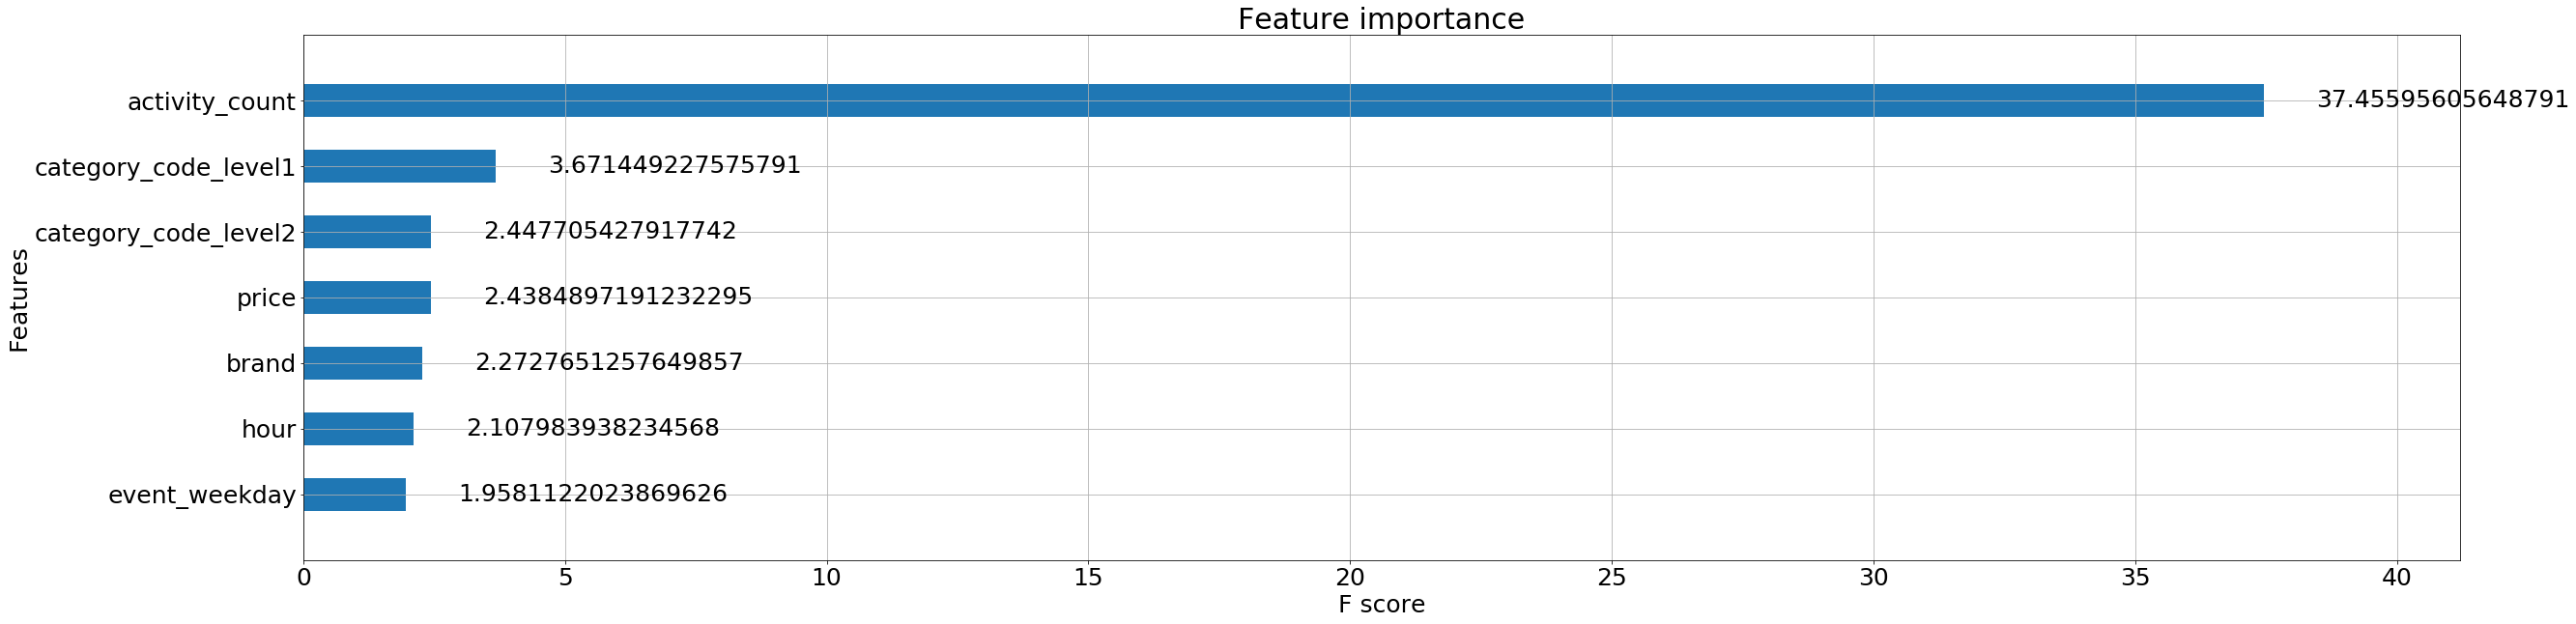

In [267]:
plot_importance(model, max_num_features=10, importance_type ='gain',height=0.5)
plt.rcParams['figure.figsize'] = (40, 10) 
plt.rcParams['font.size'] = 25
plt.show()

In [206]:

[random.(np.log(0.01), np.log(0.02)) for i in range(3)]

[0.0004322994838245749, 2.043853083048015, 0.008490159289418497]

In [309]:
param = {
    'n_estimators':random.sample(range(50,150),3),
    'max_depth':random.sample(range(5,15),2),
    'max_leaf_node':random.sample(range(5,10),2),
    'min_child_weight':random.sample(range(1,5),2),
    'subsample':random.uniform(0,1),
    'reg_alpha ':random.sample(range(1,5),2),
    'learning_rate':[random.uniform(0.01,0.001) for i in range(2)]
}

In [310]:
param

{'n_estimators': [135, 99, 87],
 'max_depth': [13, 12],
 'max_leaf_node': [5, 7],
 'min_child_weight': [4, 2],
 'subsample': 0.018092983640471738,
 'reg_alpha ': [2, 4],
 'learning_rate': [0.0026997484424453417, 0.004929935179320697]}